In [40]:
import sys
import os
from json import dump, load
import numpy as np
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('../')))
from scripts.loading_data import *
from scripts.visualize import *
from scripts.graph import *
from scripts.feature_engineering import encode
import seaborn as sn




In [14]:
#load the cleaned data
data = load_csv("data/data.csv")

In [15]:
data.head()

,Unnamed: 0,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
0,0,17.99,122.80,1001.0,0.3001,0.14710,153.40,25.38,184.60,2019.0,0.2654,1
1,1,20.57,132.90,1326.0,0.0869,0.07017,74.08,24.99,158.80,1956.0,0.1860,1
2,2,19.69,130.00,1203.0,0.1974,0.12790,94.03,23.57,152.50,1709.0,0.2430,1
3,3,11.42,77.58,386.1,0.2414,0.10520,27.23,14.91,98.87,567.7,0.2575,1
4,4,20.29,135.10,1297.0,0.1980,0.10430,94.44,22.54,152.20,1575.0,0.1625,1


In [16]:
data=data.drop(columns=["Unnamed: 0"])

In [17]:
data.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.3001,0.14710,153.40,25.38,184.60,2019.0,0.2654,1
1,20.57,132.90,1326.0,0.0869,0.07017,74.08,24.99,158.80,1956.0,0.1860,1
2,19.69,130.00,1203.0,0.1974,0.12790,94.03,23.57,152.50,1709.0,0.2430,1
3,11.42,77.58,386.1,0.2414,0.10520,27.23,14.91,98.87,567.7,0.2575,1
4,20.29,135.10,1297.0,0.1980,0.10430,94.44,22.54,152.20,1575.0,0.1625,1


### Because We used small dataset, we will be using Lasso regularization and use a threshold of 0.8 to remove weak edges.

In [21]:
graph_data = data.copy()
cg = CausalGraph(data=graph_data)


/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


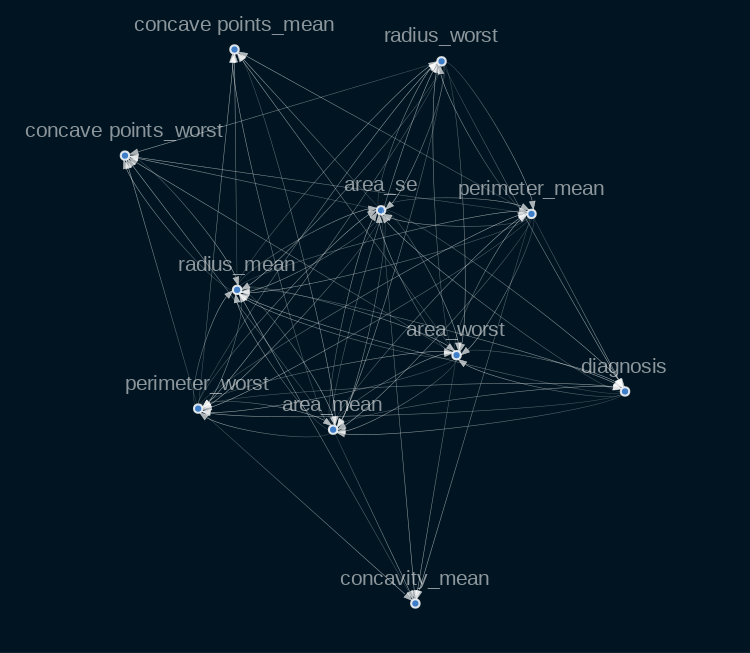

In [22]:
cg.plot_graph()

In [23]:
cg.remove_weak_edges()

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


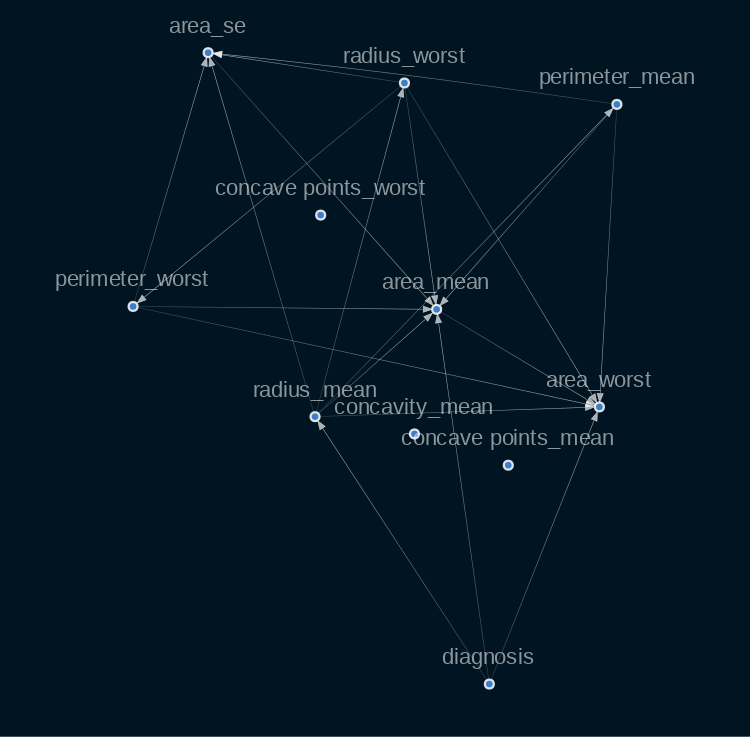

In [24]:
cg.plot_graph()

### We have a graph where arrows are going into our outcome diagnosis so we will drop this node temporarily to observe the relation between other features.

In [25]:
cg_diag_dropped = CausalGraph(data=graph_data,remove_nodes=['diagnosis'])

In [27]:
cg_diag_dropped.remove_weak_edges(0.7)

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


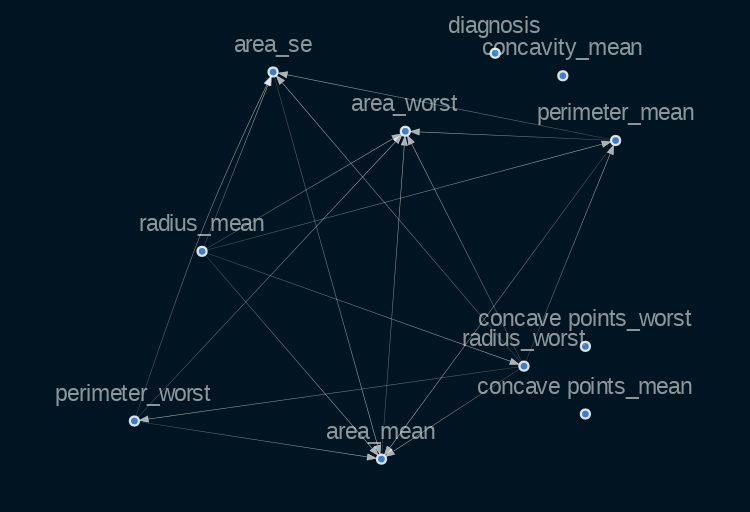

In [28]:
cg_diag_dropped.plot_graph()

### From this graph we can see valid correlation formed. We have derived that perimeter and area can be derived from radius which can be seen here, and also. since we have a graph we are confident about we will try to test the stability using different amount data points.

In [31]:
graph_data_100 = graph_data.loc[:200,:]
graph_data_250 = graph_data.loc[:250,:]
# graph_data_all = graph_data

In [32]:
graph1 = CausalGraph(data=graph_data_100,remove_nodes=['diagnosis'])
graph1.remove_weak_edges(0.7)

graph2 = CausalGraph(data=graph_data_250,remove_nodes=['diagnosis'])
graph2.remove_weak_edges(0.7)

graph3 = cg_diag_dropped

#### Get the edges of the graphs to calculate the jaccard similarity

In [33]:
sm1 = graph1.return_sm()
sm2 = graph2.return_sm()
sm3 = graph3.return_sm()

In [42]:
similarity_graph1_graph2 = jaccard_similarity(sm1.edges(), sm2.edges())
similarity_graph2_graph3 = jaccard_similarity(sm2.edges(), sm3.edges())

In [43]:
similarity_graph1_graph2,similarity_graph2_graph3

(0.889, 0.889)

/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'radius_mean', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


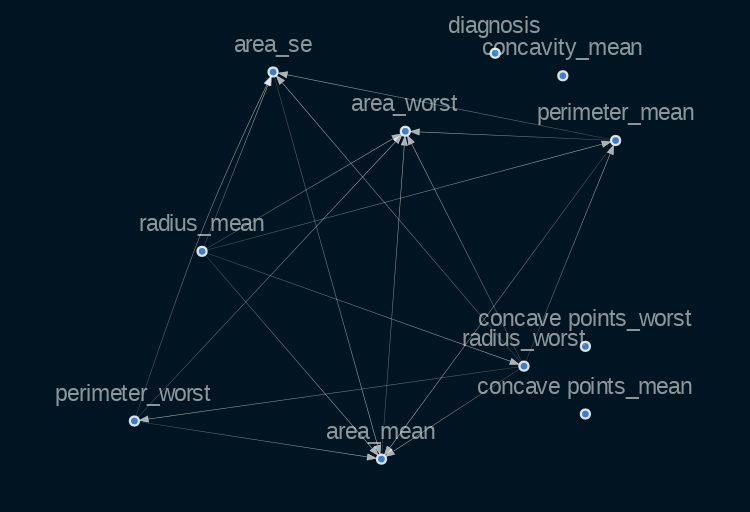

In [44]:
graph3.plot_graph()

### Looks like we still don't have a stable graph therefore since we have used all our dataset, we will different methods to get a stable graph.